# Coeficientes de Difusión

In [1]:
using LightGraphs
using GraphPlot
using Graphs
using DelimitedFiles
using LaTeXStrings
using GLM
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

In [58]:
using LsqFit

┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1186


In [69]:
using StatsBase

In [71]:
using Distributions
using GLM
using DataFrames

In [2]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

import_matrix

In [4]:
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

airport_names

In [5]:
"""

    busca_WUH(list_aerop::Array{String, 1})

La función busca_WUH tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto WUH.
Regresa el índice del aeropuerto WUH.
"""
function busca_WUH(list_aerop::Array{String, 1})

    i = 1
    while list_aerop[i] != "WUH"
        i +=1
    end
    i
end

busca_WUH

In [6]:
"""
    my_graph(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_graph(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)

end

my_graph

## Coeficiente de Difusión

$$<x^2> = \frac{1}{N} \sum_{i=1}^{N} |x^{(i)} (t) - x_0|^2$$

$$ D = \frac{<x^2>}{2t}$$


In [7]:
function difusion_coeff2(num_airline_code::Int64)

NN = 0
Ls = []
#coefs_dif2 = []
DMS = []

for k = num_airline_code #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    #index_wuh = string(airline_code, "_WUH_index.csv") 
    #indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =1:1001 #tiempo
        
        NN = 0
        Ls = []
        col = rwn[:,i]
            #@show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
               
            if indice_aerop != 0
                    
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                dist_media = spls.dists[282]
          
                L = (dist_media)^2
                NN += 1
                #@show NN
            elseif indice_aerop == 0
                L = 0
                 #   @show NN
                #N = N - 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            #@show Ls
            L = 0
            dist_media = 0
        end
        
        dms2 = (sum(Ls))/NN
        push!(DMS, dms2)
        
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2
end

difusion_coeff2 (generic function with 1 method)

In [8]:
difusion_coeff2(2)

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

In [9]:
desp_medio = ans

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

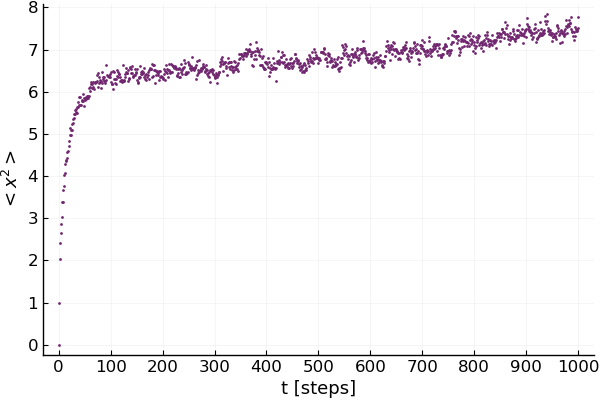

In [48]:

xs = collect(0:1000)
ys = desp_medio

g1 =scatter(xs, ys,
    xticks =:0:100:1000,
    yticks =:0:1:8,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    #title = "Diffusion",
    xlabel = "t [steps]",
    ylabel = L"<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)

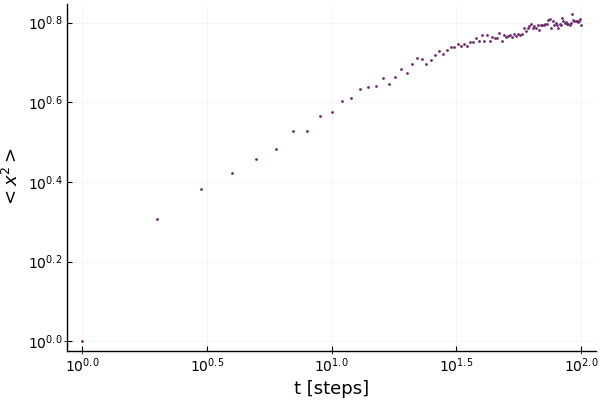

In [80]:
xs100 = collect(0:100)
ys100 = desp_medio[1:101]
xs100s = collect(1:100)
ys100s = desp_medio[2:101]

g100 =scatter(xs100s, ys100s,
    #xticks =:0:10:100,
    #yticks =:0:1:8,
    xscale =(:log10),
    yscale =(:log10),
    xtickfont = font(10, "Courier"),
    ytickfont = font(10, "Courier"),
    guidefontsize = 13,
    #title = "Diffusion",
    xlabel = "t [steps]",
    ylabel = L"<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)

In [82]:
# Hago una tabla lineal

df = hcat(xs100s, ys100s)
df = convert(DataFrame, df)

,x1,x2
,Float64,Float64
1,1.0,1.0
2,2.0,2.024
3,3.0,2.415
4,4.0,2.649
5,5.0,2.872
6,6.0,3.036
7,7.0,3.376
8,8.0,3.37538
9,9.0,3.67968


In [83]:
#Obtengo log_x
log_x = log.(df.x1)

100-element Array{Float64,1}:
 0.0               
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906
 1.6094379124341003
 1.791759469228055 
 1.9459101490553132
 2.0794415416798357
 2.1972245773362196
 2.302585092994046 
 2.3978952727983707
 2.4849066497880004
 2.5649493574615367
 ⋮                 
 4.48863636973214  
 4.499809670330265 
 4.51085950651685  
 4.5217885770490405
 4.532599493153256 
 4.543294782270004 
 4.553876891600541 
 4.564348191467836 
 4.574710978503383 
 4.584967478670572 
 4.59511985013459  
 4.605170185988092 

In [84]:
#Obtengo log_y
log_y = log.(df.x2)

100-element Array{Float64,1}:
 0.0               
 0.7050757514252192
 0.881699287104536 
 0.9741822102899327
 1.0550086511859778
 1.1105408595333834
 1.2166915767337108
 1.2165065404731925
 1.3028257048270242
 1.3259512312124222
 1.3910378477323087
 1.4061166156940619
 1.4556541989668175
 ⋮                 
 1.832416841145255 
 1.8273000519011195
 1.8381625681893279
 1.8927334470819628
 1.8568771223273743
 1.8524245187698294
 1.8526471131702134
 1.8519581837033188
 1.8478928069358027
 1.85006744061499  
 1.8613745537393325
 1.8300887329187077

In [190]:
#Lo convierto en un data frame log-log

df_log = hcat(log_x, log_y)
df_log = convert(DataFrame, df_log)

,x1,x2
,Float64,Float64
1,0.0,0.0
2,0.693147,0.705076
3,1.09861,0.881699
4,1.38629,0.974182
5,1.60944,1.05501
6,1.79176,1.11054
7,1.94591,1.21669
8,2.07944,1.21651
9,2.19722,1.30283


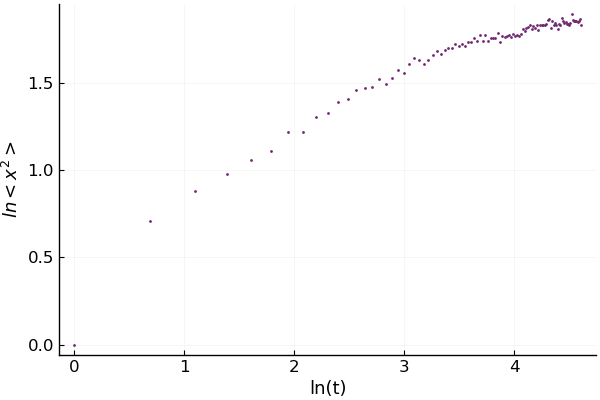

In [191]:
gl =scatter(df_log[!,1], df_log[!,2],
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    xlabel = "ln(t)",
    ylabel = L"ln<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)

In [188]:
#Lo convierto en un data frame semilog

df_slog = hcat(xs100s, log_y)
df_slog = convert(DataFrame, df_slog)

,x1,x2
,Float64,Float64
1,1.0,0.0
2,2.0,0.705076
3,3.0,0.881699
4,4.0,0.974182
5,5.0,1.05501
6,6.0,1.11054
7,7.0,1.21669
8,8.0,1.21651
9,9.0,1.30283


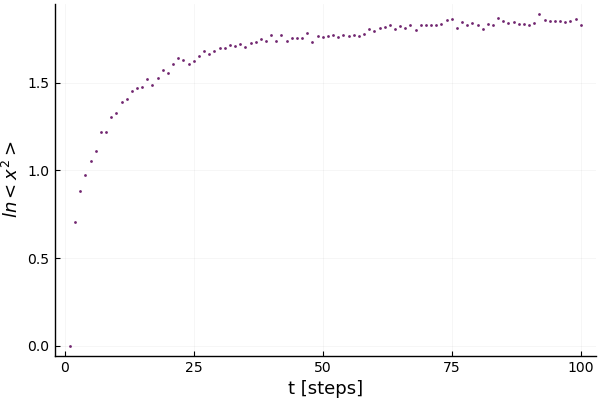

In [189]:
gsl =scatter(df_slog[!,1], df_slog[!,2],
    xtickfont = font(10, "Courier"),
    ytickfont = font(10, "Courier"),
    guidefontsize = 13,
    xlabel = "t [steps]",
    ylabel = L"ln<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)

In [192]:
#Ajustamos una recta x2 = log(y) y x1=log(x)
ajuste_log = lm(@formula(x2 ~ x1), df_log)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────
             Estimate   Std.Error  t value  Pr(>|t|)
────────────────────────────────────────────────────
(Intercept)  0.619945  0.0363497   17.055     <1e-30
x1           0.289205  0.00968608  29.8578    <1e-50
────────────────────────────────────────────────────

In [193]:
coeficientes_dc = round.(coef(ajuste_log), digits=5)

2-element Array{Float64,1}:
 0.61995
 0.2892 

In [194]:
r_2 = round.(r2(ajuste_log), digits=5)

0.90096

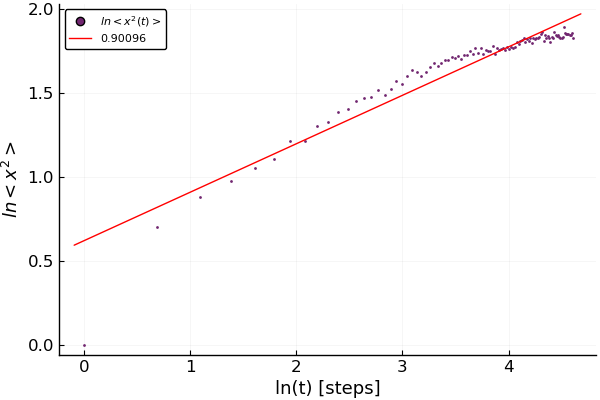

In [209]:
eq_l(x) = 0.2892(x) + 0.61995
g2 =scatter(df_log[!,1], df_log[!,2],
    #xticks =:0:10:100,
    #yticks =:0:1:8,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    xlabel = "ln(t) [steps]",
    ylabel = L"ln<x^2>",
    label = L"ln<x^2(t)>",
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)
Plots.plot!(eq_l,
    legend = true,
    label = "$r_2",
    linecolor = :red)

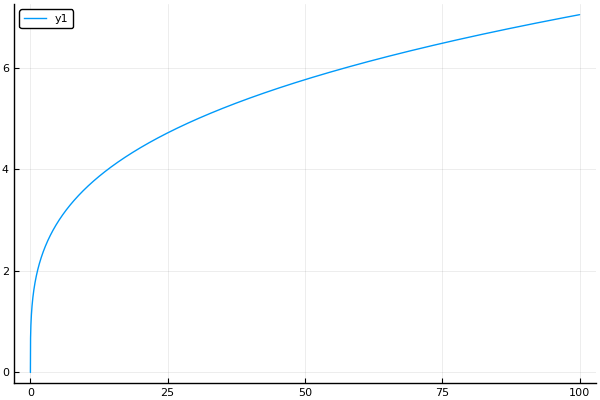

In [222]:
xt = collect(0:0.01:100)
eq(xt) = 1.8588*(xt)^(0.2892)
Plots.plot(xt, eq)
    #xlim=(0,9),
    #ylim=(0,6))

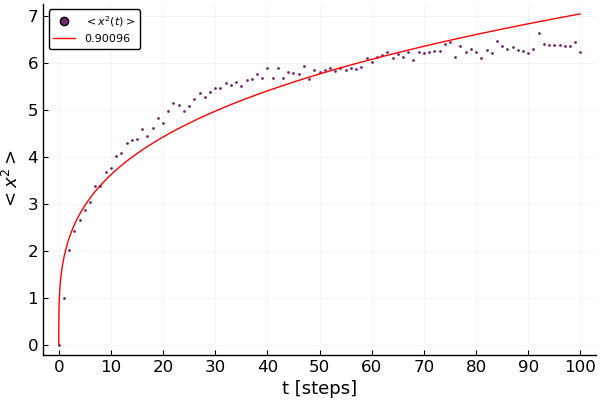

In [233]:
xs100 = collect(0:100)
ys100 = desp_medio[1:101]
xs100s = collect(1:100)
ys100s = desp_medio[2:101]

xt = collect(0:0.01:100)
eq(xt) = 1.8588*(xt)^(0.2892)

g100 =scatter(xs100, ys100,
    xticks =:0:10:100,
    yticks =:0:1:8,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    xlabel = "t [steps]",
    ylabel = L"<x^2>",
    legend = true,
    label = L"<x^2(t)>",
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)
Plots.plot!(xt, eq,
    label = "$r_2",
    linecolor =:red)

In [225]:
desp_medio

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

In [226]:
#Lo convierto en un data frame lineal segunda sección

xs900 = collect(101:1000)
ys900 = desp_medio[102:1001]

df_900 = hcat(xs900, ys900)
df_900 = convert(DataFrame, df_900)

,x1,x2
,Float64,Float64
1,101.0,6.45842
2,102.0,6.18815
3,103.0,6.18835
4,104.0,6.06035
5,105.0,6.49792
6,106.0,6.30312
7,107.0,6.47083
8,108.0,6.21771
9,109.0,6.29614


In [228]:
#Ajustamos una recta 
ajuste_900 = lm(@formula(x2 ~ x1), df_900)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
───────────────────────────────────────────────────────
               Estimate   Std.Error   t value  Pr(>|t|)
───────────────────────────────────────────────────────
(Intercept)  6.19485     0.0116221   533.021     <1e-99
x1           0.00124641  1.90925e-5   65.2825    <1e-99
───────────────────────────────────────────────────────

In [229]:
coeficientes_dc900 = round.(coef(ajuste_900), digits=5)

2-element Array{Float64,1}:
 6.19485
 0.00125

In [230]:
r_2_900 = round.(r2(ajuste_900), digits=5)

0.82596

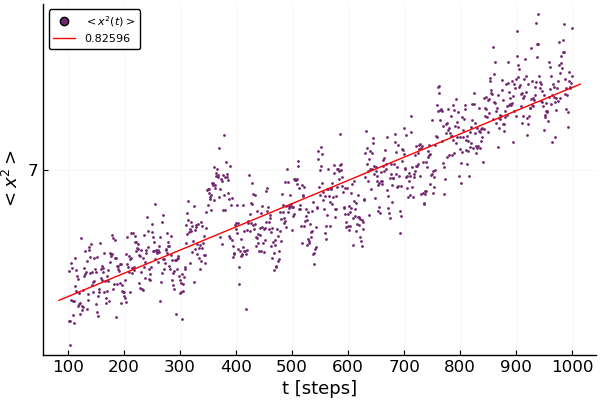

In [234]:
#xt = collect(0:0.01:100)
eq900(x) = 0.00125(x) + 6.19485

g900 =scatter(xs900, ys900,
    xticks =:100:100:1000,
    yticks =:0:1:8,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    #title = "Diffusion",
    xlabel = "t [steps]",
    ylabel = L"<x^2>",
    legend = true,
    label = L"<x^2(t)>",
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)
Plots.plot!(eq900,
    label = "$r_2_900",
    linecolor =:red)

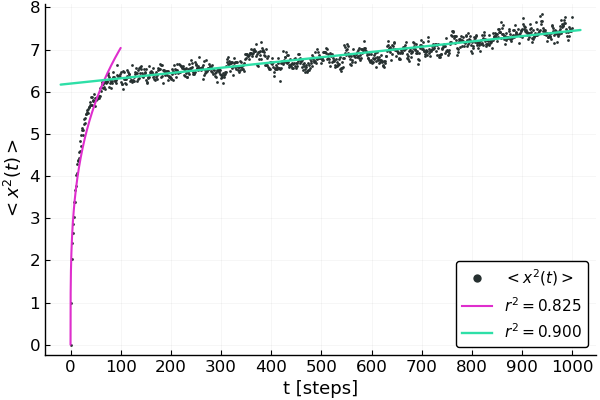

In [299]:
xs100 = collect(0:100)
ys100 = desp_medio[1:101]
xs100s = collect(1:100)
ys100s = desp_medio[2:101]

xt = collect(0:0.01:100)
eq(xt) = 1.8588*(xt)^(0.2892)
eq900(x) = 0.00125(x) + 6.19485

gtodo =scatter(xs, ys,
    xticks =:0:100:1000,
    yticks =:0:1:8,
    xtickfont = font(12, "Courier"),
    ytickfont = font(12, "Courier"),
    guidefontsize = 13,
    xlabel = "t [steps]",
    ylabel = L"<x^2(t)>",
    legend = true,
    legendfontsize = 11,
    label = L"<x^2(t)>",
    markercolor = "#263030",
    markerstrokewidth = 0,
    markerstrokealpha = 0,
    markersize = 2,
    gridalpha = 0.05)
Plots.plot!(xt, eq,
    label = L"r^2=0.825",
    linewidth = 1.5,
    linecolor = "#DF2ECD")
Plots.plot!(eq900,
    label = L"r^2=0.900",
    linewidth = 1.7,
    linecolor = "#2EDFA7")  #2BBBD8 #2A73EC #2EDFA7